# Binary Classification Using K-NN - Data Scaling


In this notebook we investigate the impact of data scaling on the performance of a K-NN classifier. We scale the features via a process called **Standardization**.

Standardization is a useful technique to transform features with a Gaussian distribution and differing means and standard deviations to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1.

We will use Scikit-Learn's (sklearn.preprocessing) StandardScaler for this purpose. Another technique is to use sklearn.preprocessing.scale.


### Note: 

Data scaling requirement varies depending on the type of distance metric being used by the model. In this notebook we use the Minkowski distance metric. Thus, we standardize the data during preprocessing.

- Minkowski: Standardize the data during preprocessing
- Mahalanobis: No need to Standardize the data during preprocessing

In [1]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler, scale
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Dataset

We create a synthetic dataset that consists of datapoints from two classes (class 0 and 1).

(200, 2)
(250, 2)


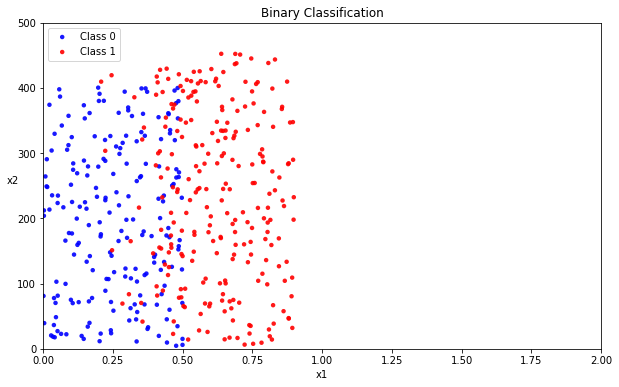

In [2]:
np.random.seed(43)

m0 = 200  # no. of training examples for class 0


# Generate class 0 data points randomly from a uniform distribution
#    Here a & b are 2 dimensions for each data (feature) point
a = 0.5 *np.random.rand(m0,1)
b = 2 + a + 400*np.random.rand(m0,1)


# Concatenate the 2 dimensions of each feature to create the data matrix for class 0 
X0 = np.concatenate((a, b), axis=1)

# Create the target vector for class 0 (target is coded with zeros)
X0_target = np.zeros((m0,), dtype=np.int).reshape(-1, 1)

print(X0.shape)


m1 = 200  # no. of training examples for class 1


# Generate class 1 data points randomly from a uniform distribution
#    Here c & d are 2 dimensions for each data (feature) point
c = 0.4 + 0.5 *np.random.rand(m1,1)
d = 2 + c + 450*np.random.rand(m1,1)

# Concatenate the 2 dimensions of each feature to create the data matrix for class 1
X1a = np.concatenate((c, d), axis=1)



# Add 50 more training examples for class 1

e = 0.2 + 0.5 *np.random.rand(50,1)
f = 23 + e + 400*np.random.rand(50,1)
X1b = np.concatenate((e, f), axis=1)

# Create the target vector for class 1 (target is coded with ones)
X1_target = np.ones((m1+50,), dtype=np.int).reshape(-1, 1)


# All training examples for class 1
X1 = np.append(X1a, X1b, axis=0)
print(X1.shape)


# All training examples for class 0 and 1
X = np.append(X0, X1, axis=0)

# All target values for class 0 & 1
y = np.concatenate((X0_target, X1_target), axis=0)



# Draw a scatter plot
fig = plt.figure(figsize=(10, 6))
plt.scatter(X0[:, 0], X0[:, 1],alpha=0.9, c="blue", edgecolors='none', s=20, label="Class 0")
plt.scatter(X1[:, 0], X1[:, 1],alpha=0.9, c="red", edgecolors='none', s=20, label="Class 1")
plt.xlim(0,2)
plt.ylim(0,500)
plt.title("Binary Classification")
plt.legend(loc=2)
plt.xlabel("x1")
plt.ylabel("x2", rotation=0)
plt.show()

# Feature Scaling

Feature scaling is required when we use the **Minkowski** distance metric.

The Standardization technique is used to scale the features along their respective dimensions as well as normalize the data to center it around the mean.

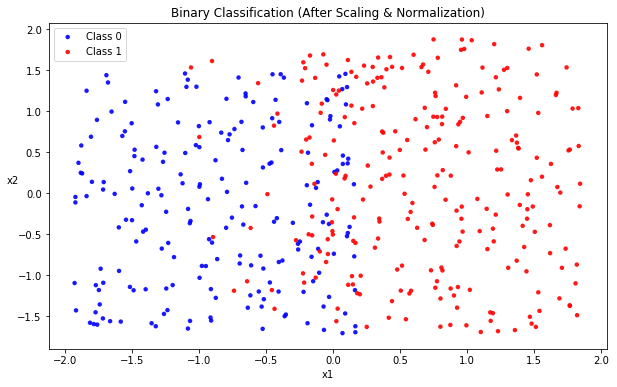

In [3]:
# Two techniques for scaling the data matrix

# Technique 1
scaler = StandardScaler().fit(X)
X = scaler.transform(X)


# Technique 2
#X = scale(X)

# Get the datapoints from each class to plot them
X0_scaled = X[0:200, :]
X1_scaled = X[200:, :]

# Draw a scatter plot
fig = plt.figure(figsize=(10, 6))
plt.scatter(X0_scaled[:, 0], X0_scaled[:, 1],alpha=0.9, c="blue", edgecolors='none', s=20, label="Class 0")
plt.scatter(X1_scaled[:, 0], X1_scaled[:, 1],alpha=0.9, c="red", edgecolors='none', s=20, label="Class 1")
# plt.xlim(0,2)
# plt.ylim(0,500)
plt.title("Binary Classification (After Scaling & Normalization)")
plt.legend(loc=2)
plt.xlabel("x1")
plt.ylabel("x2", rotation=0)
plt.show()

# Create Test and Train Dataset

The target y is defined as a 1D vector. The sklearn KNeighborsClassifier model requires the target to be a 1D array. 

We use the numpy.ravel() function to create a flattened array from the 1D vector y.

In [4]:
# Convert the target as a 1D array
y = y.ravel()


# Spilt the dataset into training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(360, 2)
(90, 2)
(360,)
(90,)


## Create the K-NN Model & Vary K

We will create the K-NN model and fit the training data on the model.

### Choose optimum K

We determine the optimum K by evaluating the K-NN model for various values of K. 

The K-NN model is evaluated by computing a performance measure. There are various performamce measures for classification problems.

The sklearn KNeighborsClassifier model uses, by default, "accuracy" as the performance measure. However, in a skewed dataset, accuracy doesn't provide a good estimate of the performance of the model. We will have to use confusion matrix, precision, recall, f1 score, etc.

But for now, let's use KNeighborsClassifier's default accuracy score function to evalute the model's performance for various values of K.

In [5]:
# Set the the range of K 
neighbors = np.arange(1,50)

# Two arrays to store training and test accuracies
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    
    # The "score" function returns the mean accuracy on the given train/test data and labels.
    # Note that "accuracy" may not be a good performance measure in a skewed data set
    # Thus, we need to do hyperparameter tuning by using better performance measures (e.g., f1 score, presision, recall)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 
    

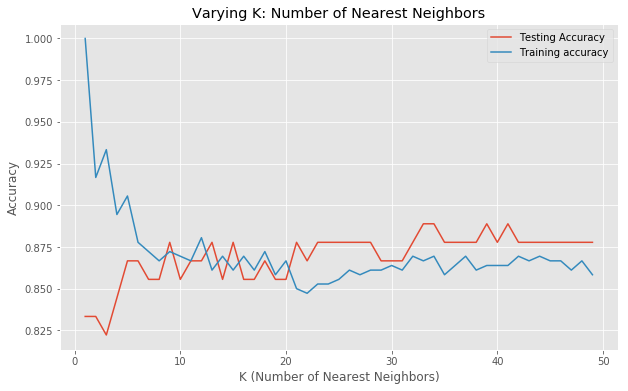

In [6]:

import matplotlib.pyplot as plt

plt.style.use('ggplot')
fig = plt.figure(figsize=(10, 6))
plt.title('Varying K: Number of Nearest Neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('K (Number of Nearest Neighbors)')
plt.ylabel('Accuracy')
plt.show()

# Determine the Opimum K 

From the above diagram, find the the value of K that gives maximum accuracy on the test data.


#### <font color=red>A better alternative for finding optimal K is to perform model selection via cross validation.</font>

## Model Selection: Hyperparameter Tunining


A K-NN model is defined by a set of parameters: nearest neighbors (K), distance metric (p), etc. These are called hyperparameters.

We need to select the best model based on the optimal values of these hyperparameters. This process is called hyperparameter tuning.

The best way to do hyperparameter tuning is to use cross-validation.

We will use Scikit-Learn’s GridSearchCV to search the combinations of hyperparameter values that provide best performance.

We need to tell which hyperparameters we want the GridSearchCV to experiment with, and what values to try out. It will evaluate all the possible combinations of hyperparameter values, using cross-validation. 


## Important:

The GridSearchCV takes an argument to define the scoring metric (performance measure). 

See the list of possible scoring functions:
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

For multiclass classification, we may use "f1_micro" scoring function. The f1_micro function is the average of the F1 score of each class with weighting depending on the average parameter.

In the binary classification, f1 score function can be used. We may also use the precision, recall, roc_auc functions.



In [7]:
%%time

warnings.filterwarnings('ignore')

# The param_grid tells Scikit-Learn to evaluate all combinations of the hyperparameter values 
param_grid = {'n_neighbors': np.arange(1,37, 2), 'p': [1, 2, 5,  10, 20, 30, 50, 100], 
              'weights': ["uniform", "distance"]}

knn = KNeighborsClassifier()

knn_cv = GridSearchCV(knn, param_grid, scoring='f1', cv=5)
knn_cv.fit(X_train, y_train)


params_optimal_knn = knn_cv.best_params_

print("Best Score: %f" % knn_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_knn)
print("\n")

Best Score: 0.877880
Optimal Hyperparameter Values:  {'n_neighbors': 35, 'weights': 'uniform', 'p': 1}


CPU times: user 15.8 s, sys: 54.7 ms, total: 15.8 s
Wall time: 15.8 s


## Select The Best Model 

Using the optimal hyperparameter values, create the best model.
Then, fit the model.

## Note on Using Mahalanobis Distance Metric:

Note that the Mahalanobis distance metric works only with the brute force algorithm in sklearn.

Also the data should not be scaled & normalized before using the Mahalanobis distance metric.

In [8]:
knn = KNeighborsClassifier(**params_optimal_knn)
knn.fit(X_train, y_train) 

y_train_predicted = knn.predict(X_train)

train_accuracy_knn = np.mean(y_train_predicted == y_train)
print("\nTraining Accuracy: ", train_accuracy_knn)


Training Accuracy:  0.8583333333333333


## Evaluate Model Performance on Training Data 

Evaluate the model's performance using cross-validation. 

Use Scikit-Learn's cross_val_score function. 

Note that the "scoring" argument should be set based on the type of classification (binary/multiclass).

In [9]:
# Scoring Parameter for Classification:
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
# Note: For a skewed data set "accuracy" might not be a good choice for scoring
scores = cross_val_score(knn, X_train, y_train, scoring='f1', cv=3)
print(scores)

print("F1 Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.89361702 0.88059701 0.86821705]
F1 Score: 0.88 (+/- 0.02)


## Evalute The Model Using Confusion Matrix on Training Data


We use the cross_val_predict() function to perform cross-validation. 

However, unlike cross_val_score, it doesn't return the evaluation scores.

Instead it returns the predictions made on each test fold. 

This means that we get a clean prediction for each instance in the training set.

By “clean” we mean that the prediction is made by a model that never saw the data during training.

In [10]:
y_train_pred = cross_val_predict(knn, X_train, y_train, cv=5)

confusion_matrix(y_train, y_train_pred)

array([[131,  29],
       [ 21, 179]])

# Precision, Recall & F1 Score for Training Data

In [11]:
precision = precision_score(y_train, y_train_pred) 
print("Precision = %f" % precision)

recall = recall_score(y_train, y_train_pred)
print("Recall = %f" % recall)


f1 = f1_score(y_train, y_train_pred)
print("F1 Score = %f" % f1)

Precision = 0.860577
Recall = 0.895000
F1 Score = 0.877451


# Evaluate The Model Using Test Data

The KNeighborsClassifier model has a default "score" function that computes the accuracy of the model.

Often times the accuracy is not a good measure.

We also compute the other performance measures, such as the confusion matrix, precision, recall, and the F1 score for the test data.

## Confusion Matrix for Test Data

In [12]:
# The accuracy of the model
test_accuracy_knn = knn.score(X_test, y_test)
print("\nTest Accuracy: ", test_accuracy_knn)



# No. of Correct Predictions
y_test_predicted = knn.predict(X_test)
print("\nNo. of correct predictions (Test): %d/%d" % (np.sum(y_test_predicted == y_test), len(y_test)))



# Confusion Matrix
print("\nConfusion Matrix (Test Data):\n", confusion_matrix(y_test, y_test_predicted))


Test Accuracy:  0.8555555555555555

No. of correct predictions (Test): 77/90

Confusion Matrix (Test Data):
 [[33  7]
 [ 6 44]]


## Precision, Recall & F1 Score for Test Data

In [13]:
precision = precision_score(y_test, y_test_predicted) 
print("Precision = %f" % precision)

recall = recall_score(y_test, y_test_predicted)
print("Recall = %f" % recall)


f1 = f1_score(y_test, y_test_predicted)
print("F1 Score = %f" % f1)


Precision = 0.862745
Recall = 0.880000
F1 Score = 0.871287


# Function for Plotting Decision Bounday 


To better understand how the K Nearest Neighbors model classifier performs classifiation, we need to **<font color=red size=6> visualize </font>** its decision boundary.


We define the function "decision_boundary_class_colored" to plot the decision boundary. 

In [14]:
def decision_boundary_class_colored(clf, X, plotDistanceFromHyperplane=False, colorBar=False):
    
    # Get the min and max value of feature x1
    x1min, x1max = X[:,0].min() - 1, X[:, 0].max() + 1
    
    # Get the min and max value of feature x2
    x2min, x2max = X[:,1].min() - 1, X[:, 1].max() + 1
    
    # Create the mesh grid
    x1s = np.linspace(x1min, x1max, 100)
    x2s = np.linspace(x2min, x2max, 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    
    
    # Create pairs of new points from the grid
    X_new = np.c_[x1.ravel(), x2.ravel()]
    
    
    # Compute the class predictions for all new points
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    
    # Generate the contourf plot for the predictions
    plt.contourf(x1, x2, y_pred, cmap=plt.cm.binary, alpha=0.8)
    
    
    if(plotDistanceFromHyperplane == True):
    
        # Compute the signed distance of a sample to the hyperplane for all new points
        y_decision = clf.decision_function(X_new).reshape(x1.shape)

        # Generate the contourf plot for the distance of all points from the hyperplane
        plt.contourf(x1, x2, y_decision, cmap=plt.cm.bwr, alpha=0.2)
    
    if(colorBar==True):
        plt.colorbar()
    

## Visualize the Decision Boundary

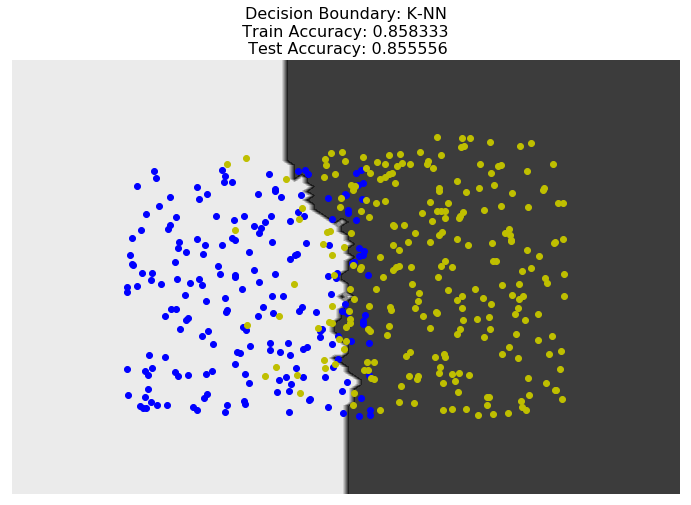

In [15]:
plt.figure(figsize=(12, 8))

decision_boundary_class_colored(knn, X, plotDistanceFromHyperplane=False)
plt.plot(X[y.ravel()==0, 0], X[y.ravel()==0, 1], "bo")
plt.plot(X[y.ravel()==1, 0], X[y.ravel()==1, 1], "yo")
plt.title("Decision Boundary: K-NN\n Train Accuracy: %f \n Test Accuracy: %f"% 
          (train_accuracy_knn, test_accuracy_knn) , fontsize=16)
plt.xticks(())
plt.yticks(())



plt.show()